In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plxoii_o
from scipy.stats import zscore
import klib
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [2]:
# import data
dataset = pd.read_csv("creditcard.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# display columns
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
# display data information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# display descriptive statistics of numeric data columns
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# display descriptive statistics of all data columns
dataset.describe(include = "all")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# display type columns
dataset.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [8]:
# number of null values ​​per column
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: >

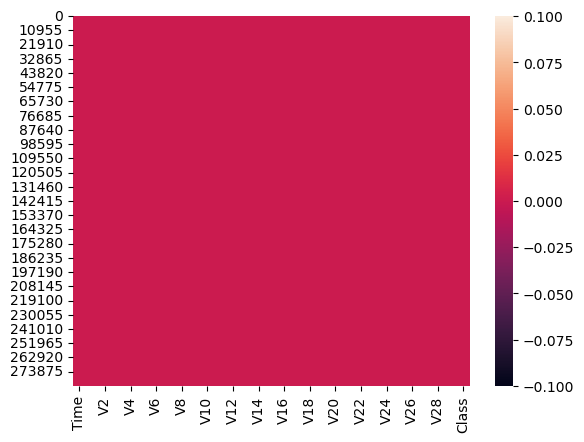

In [9]:
# schema consult the number of null values ​​per column
sns.heatmap(dataset.isnull())

In [10]:
# duplicate columns
dataset.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

In [11]:
dataset.duplicated().sum()

1081

In [12]:
dataset.drop_duplicates(inplace= True)

In [13]:
dataset.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 283726, dtype: bool

In [14]:
dataset.duplicated().sum()

0

In [15]:
# the Class column values
dataset['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [16]:
dict_class = dataset['Class'].value_counts().to_dict()
dict_class

{0: 283253, 1: 473}

In [17]:
from imblearn.over_sampling import ADASYN  

# Assuming 'dataset' is previously defined DataFrame with your data  
X = dataset.drop(columns=["Class"])  
Y = dataset["Class"]  

# Check class distribution  
print(Y.value_counts())  

if Y.nunique() > 1:  # Check if there are at least two classes  
    ada = ADASYN(random_state=42)  
    X_resampled, y_resampled = ada.fit_resample(X, Y)  

    df_resampled = pd.concat([X_resampled, y_resampled], axis=1)  
    dataset = df_resampled  
else:  
    print("Error: The target variable must have more than one class.")  

Class
0    283253
1       473
Name: count, dtype: int64


In [18]:
# the Class column values
dataset['Class'].value_counts()

Class
1    283299
0    283253
Name: count, dtype: int64

In [19]:
dict_class = dataset['Class'].value_counts().to_dict()
dict_class

{1: 283299, 0: 283253}

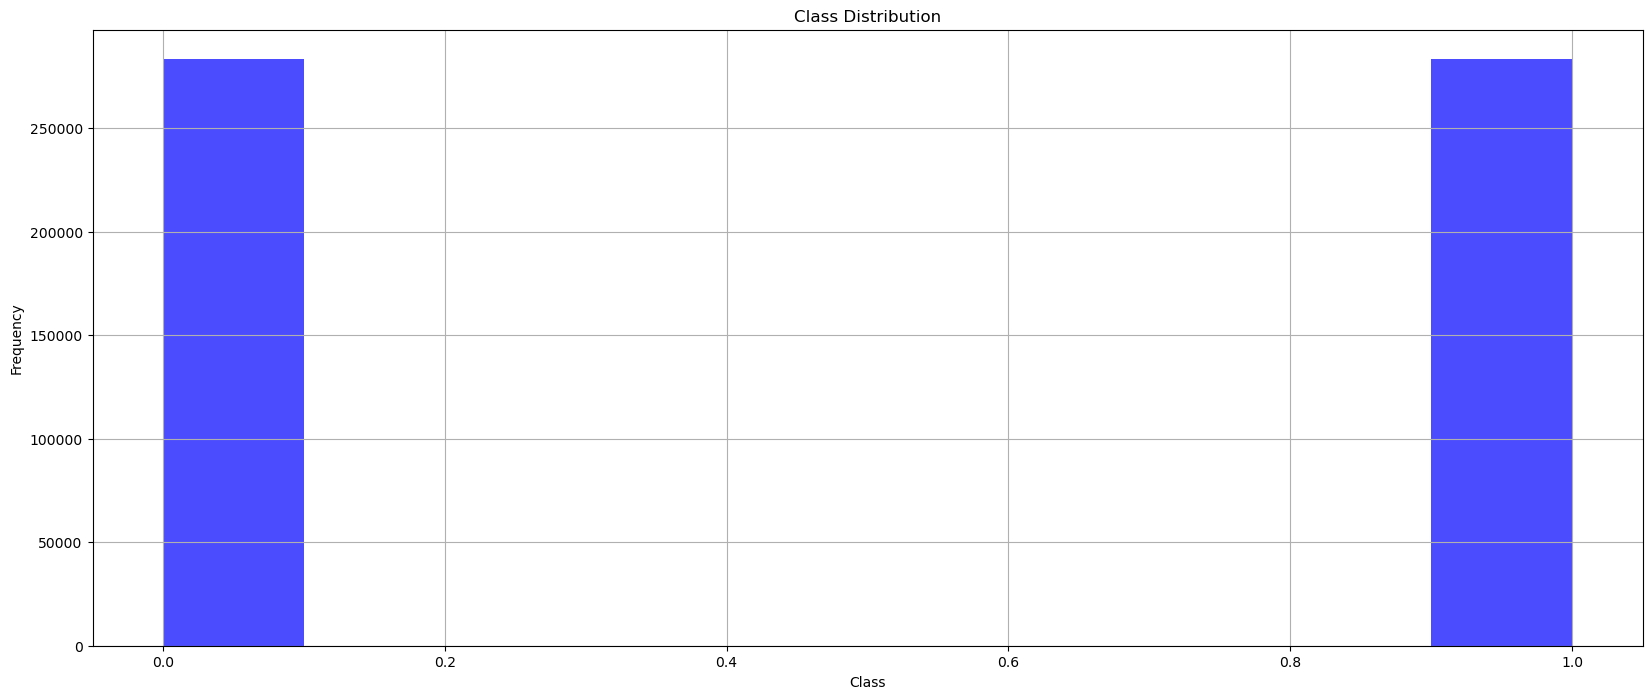

In [20]:
plt.figure(figsize=(20, 8))
dataset['Class'].hist(color='blue', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

<Axes: xlabel='Class', ylabel='count'>

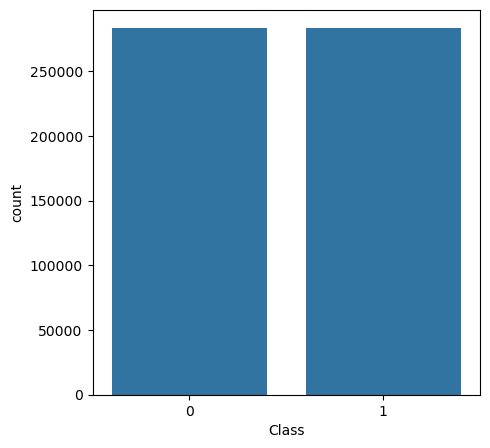

In [21]:
plot=plt.figure(figsize=(5,5))
sns.countplot(x='Class',data=dataset)

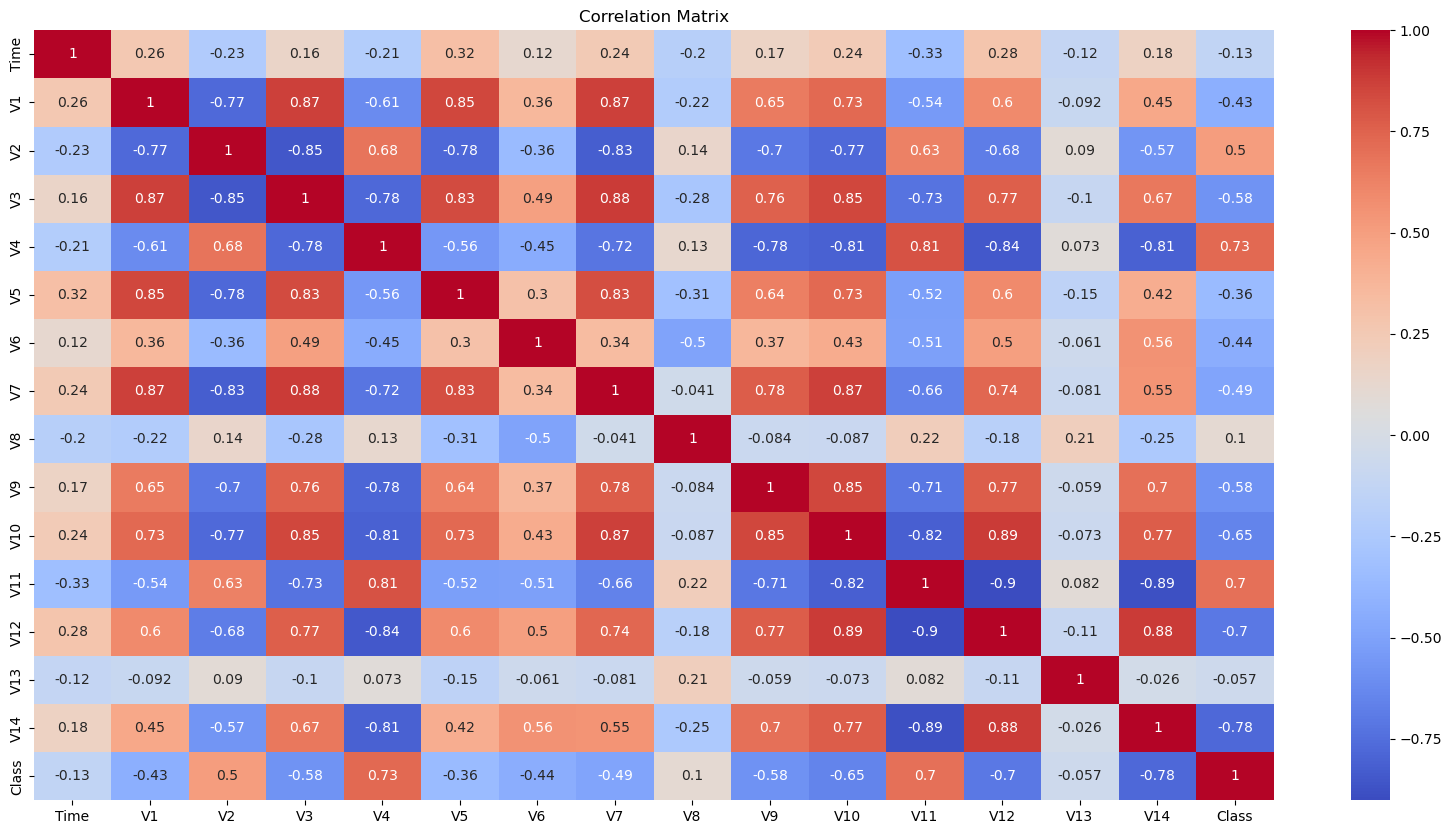

In [22]:
corr_matrix = dataset.corr()
first_half_columns = corr_matrix.columns[:15].tolist() + ['Class']
corr_matrix = corr_matrix.loc[first_half_columns, first_half_columns]
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

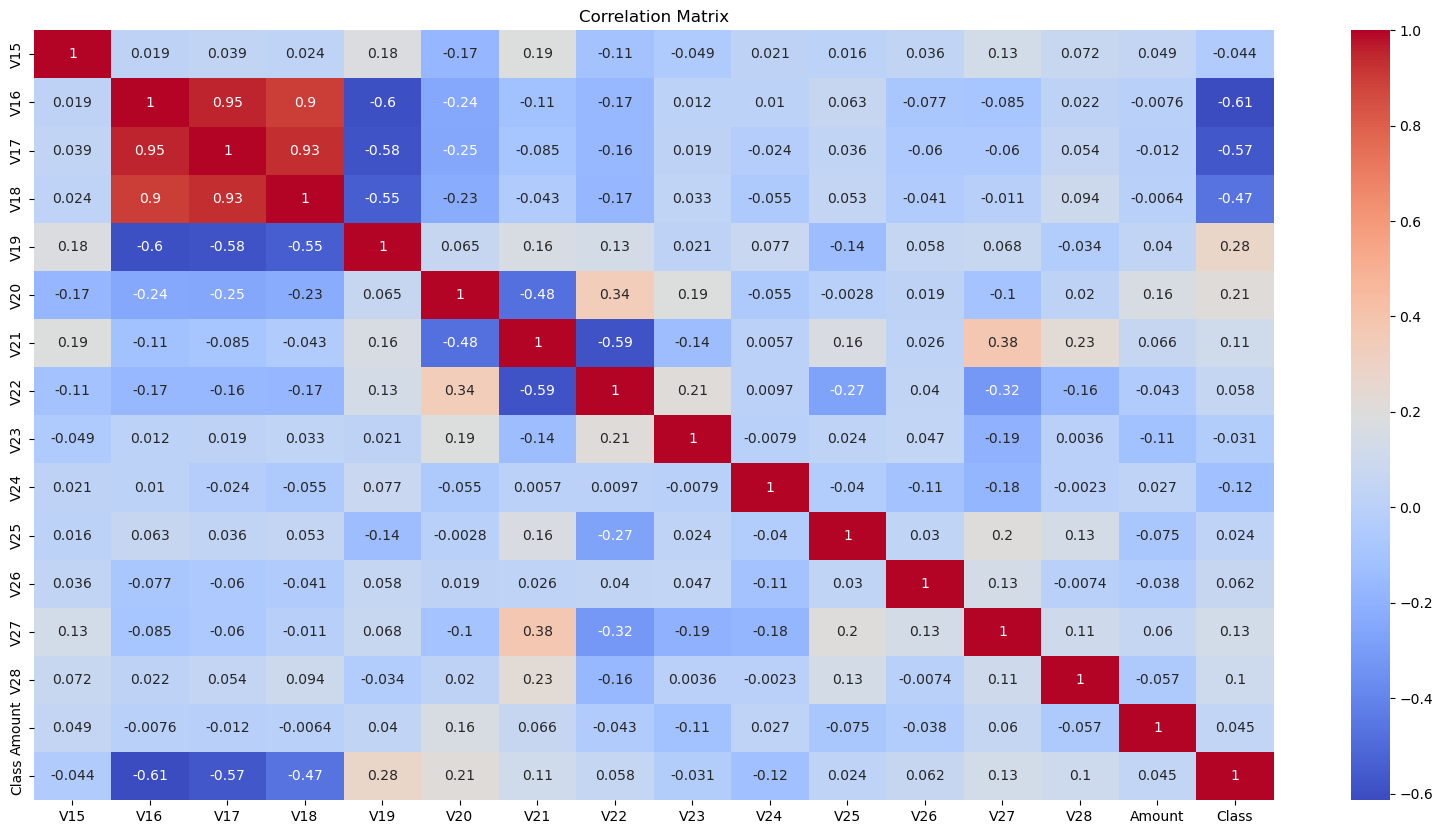

In [23]:
corr_matrix = dataset.corr()
second_half_columns = corr_matrix.columns[15:].tolist()
corr_matrix = corr_matrix.loc[second_half_columns, second_half_columns]
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Axes: >

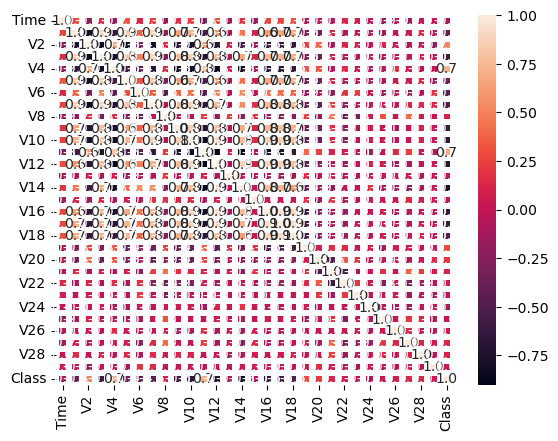

In [24]:
# graphical representation of data where individual values
num_cols = dataset.select_dtypes(include='number').columns

corr_matrix = dataset[num_cols].corr()
corr_matrix

sns.heatmap(corr_matrix,annot=True,fmt='.1f',linewidths=4)

In [25]:
#Handle outliers
numeric_columns = dataset.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_columns))
cleaned_dataset = dataset.copy()

#iterate over each numeric column
for col in numeric_columns.columns:
    median = numeric_columns[col].median()
    outliers = z_scores[col] > 3
    cleaned_dataset.loc[outliers, col] = median

dataset = cleaned_dataset

C:\Users\USER\AppData\Local\Temp\ipykernel_3148\3074663030.py:7: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


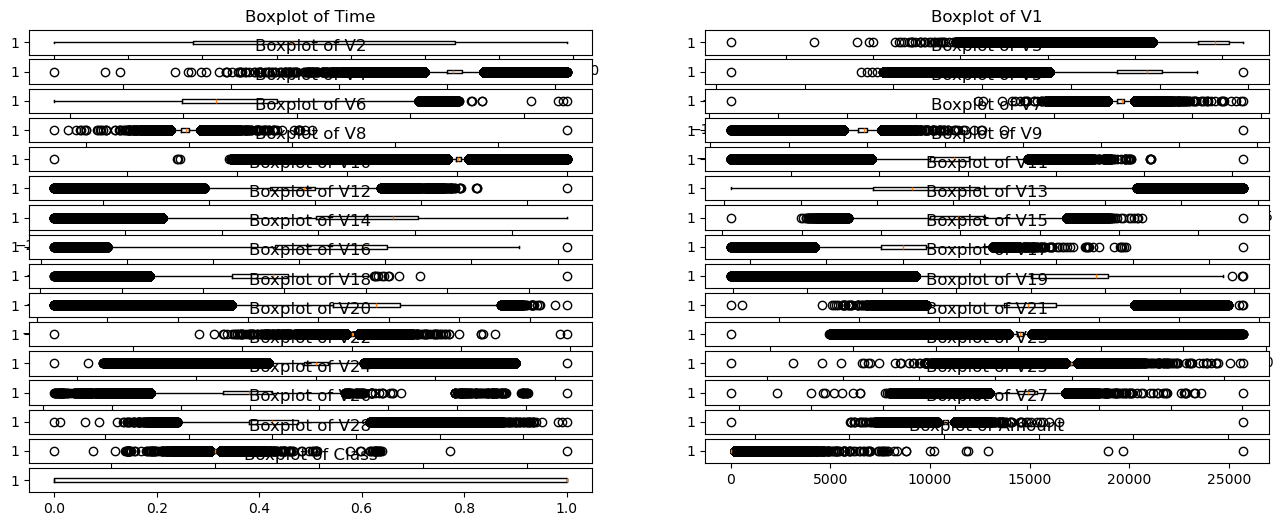

In [26]:
#Boxplots
plt.figure(figsize=(16, 6))
for i, column in enumerate(numeric_columns.columns):
    plt.subplot((len(numeric_columns.columns) + 1) // 2, 2, i + 1)
    plt.boxplot(numeric_columns[column], vert=False)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [27]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.226249,-0.219098,0.037088,-0.181380,0.297929,0.128281,0.286580,-0.185846,0.174673,0.276055,-0.267937,0.272855,-0.118052,0.150557,-0.165543,0.253561,0.232951,0.266686,-0.085441,-0.105536,-0.071665,0.152158,0.097853,0.008175,-0.213665,-0.063870,-0.181146,-0.057743,0.009378,-0.129570
V1,0.226249,1.000000,-0.621878,0.648033,-0.493298,0.649426,0.336224,0.689495,-0.354530,0.560816,0.648437,-0.478553,0.613015,-0.085417,0.543238,0.002922,0.595929,0.528124,0.499604,-0.373132,-0.105381,-0.117086,-0.141325,-0.061105,0.017886,0.076506,-0.053732,-0.078584,0.125785,-0.090816,-0.445739
V2,-0.219098,-0.621878,1.000000,-0.704691,0.615759,-0.594907,-0.414374,-0.651801,0.343941,-0.638445,-0.709351,0.602329,-0.666474,0.136907,-0.668517,-0.049161,-0.582689,-0.519840,-0.456237,0.271233,0.146290,0.143484,0.057815,0.059329,-0.097252,0.005242,0.120524,0.169605,0.108304,-0.165195,0.528020
V3,0.037088,0.648033,-0.704691,1.000000,-0.754798,0.575032,0.472293,0.640226,-0.415806,0.644285,0.726281,-0.683161,0.697760,-0.075573,0.712764,0.061968,0.643825,0.573800,0.488820,-0.366144,-0.189828,-0.246423,-0.085409,-0.017664,0.055766,0.059335,-0.091058,-0.117190,0.010139,-0.053448,-0.622693
V4,-0.181380,-0.493298,0.615759,-0.754798,1.000000,-0.419073,-0.477001,-0.597111,0.291057,-0.679092,-0.703166,0.730795,-0.732043,0.059902,-0.752907,-0.072650,-0.646537,-0.600322,-0.511316,0.316835,0.283170,0.281348,0.019165,-0.002329,-0.085087,-0.032091,0.122701,0.227316,0.092258,0.017736,0.731002
V5,0.297929,0.649426,-0.594907,0.575032,-0.419073,1.000000,0.239300,0.646767,-0.416621,0.545079,0.626400,-0.469280,0.552352,-0.148441,0.477511,-0.015451,0.551653,0.535538,0.540031,-0.424077,-0.113453,-0.145740,-0.158557,-0.101338,-0.022350,0.082948,-0.060009,-0.096193,0.085524,-0.157347,-0.334663
V6,0.128281,0.336224,-0.414374,0.472293,-0.477001,0.239300,1.000000,0.488923,-0.338707,0.487964,0.554951,-0.514438,0.475880,-0.053387,0.573385,-0.010899,0.403592,0.371093,0.315588,-0.191843,-0.259898,-0.306442,0.153457,0.193658,0.017873,-0.141343,-0.046721,-0.279612,-0.166948,0.119888,-0.460877
V7,0.286580,0.689495,-0.651801,0.640226,-0.597111,0.646767,0.488923,1.000000,-0.422032,0.666055,0.797308,-0.624549,0.685359,-0.156402,0.666505,0.012284,0.672793,0.631672,0.606605,-0.431994,-0.226304,-0.257873,-0.051288,0.020626,0.059690,-0.036344,-0.101352,-0.289930,-0.054373,0.038389,-0.512377
V8,-0.185846,-0.354530,0.343941,-0.415806,0.291057,-0.416621,-0.338707,-0.422032,1.000000,-0.349405,-0.425252,0.325420,-0.277085,0.123071,-0.346928,0.092222,-0.302146,-0.218008,-0.216674,0.266638,-0.000948,0.432234,-0.058581,-0.185947,0.023713,0.065320,0.090955,0.125136,-0.037325,0.034336,0.176990
V9,0.174673,0.560816,-0.638445,0.644285,-0.679092,0.545079,0.487964,0.666055,-0.349405,1.000000,0.758633,-0.647115,0.687728,-0.086696,0.725145,0.027049,0.615149,0.598685,0.539707,-0.331789,-0.322830,-0.204760,-0.066835,0.015890,0.128004,-0.049476,-0.180362,-0.354828,-0.119734,-0.017517,-0.590713


In [28]:
# Separate the features and the target variable
X = dataset.iloc[ : , :-1]
y = dataset.iloc[ : , -1]

In [29]:
# Split the data into training and testing sets (80% train, 20% test) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  

In [30]:
# Normalize features
scaler = StandardScaler()  
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test) 

In [31]:
# Permit to choose the best k number
scores = []
n_neighbors = 15
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("Accuracy for k=", k, "is:", round(accuracy_score(y_pred, y_test), 2))
    scores.append(round(accuracy_score(y_pred, y_test), 2))

Accuracy for k= 1 is: 0.98
Accuracy for k= 2 is: 0.98
Accuracy for k= 3 is: 0.97
Accuracy for k= 4 is: 0.97
Accuracy for k= 5 is: 0.96
Accuracy for k= 6 is: 0.96
Accuracy for k= 7 is: 0.95
Accuracy for k= 8 is: 0.95
Accuracy for k= 9 is: 0.95
Accuracy for k= 10 is: 0.94
Accuracy for k= 11 is: 0.94
Accuracy for k= 12 is: 0.94
Accuracy for k= 13 is: 0.93
Accuracy for k= 14 is: 0.93


In [32]:
# Subsample for quicker testing  
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.1, stratify=y, random_state=42)  

# Scale features  
scaler = StandardScaler()  
X_sample_scaled = scaler.fit_transform(X_sample)  

# Define the KNeighborsClassifier  
knn = KNeighborsClassifier()  

# Define hyperparameter grid  
param_grid_knn = {  
    'n_neighbors': [5, 10, 15],  
    'weights': ['uniform', 'distance'],  
    'metric': ['euclidean', 'manhattan']  
}  

# Perform Grid Search with reduced CV folds  
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=3, n_jobs=-1, verbose=2)  
grid_search_knn.fit(X_sample_scaled, y_sample)  

# Output best parameters and scores  
best_params_knn = grid_search_knn.best_params_  
best_score_knn = grid_search_knn.best_score_  

print(f"Best parameters for KNN: {best_params_knn}")  
print(f"Best cross-validation score for KNN: {best_score_knn}") 

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation score for KNN: 0.9947224428558821


In [33]:
# Initialize the K-NN classifier  
k = 5  # you can adjust the number of neighbors according to your needs  
knn_model = KNeighborsClassifier(n_neighbors=k)

In [34]:
# Train the model
knn_model.fit(X_train_scaled, y_train) 

KNeighborsClassifier()

In [35]:
# Making predictions on test data 
y_pred = knn_model.predict(X_test_scaled)  

In [36]:
# Evaluate the model  
print("Matrice de Confusion:\n", confusion_matrix(y_test, y_pred))  
print("Rapport de Classification:\n", classification_report(y_test, y_pred))  
print("Taux de Précision:\n", accuracy_score(y_test, y_pred))  

Matrice de Confusion:
 [[56514   137]
 [    0 56660]]
Rapport de Classification:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       1.00      1.00      1.00     56660

    accuracy                           1.00    113311
   macro avg       1.00      1.00      1.00    113311
weighted avg       1.00      1.00      1.00    113311

Taux de Précision:
 0.9987909382142952


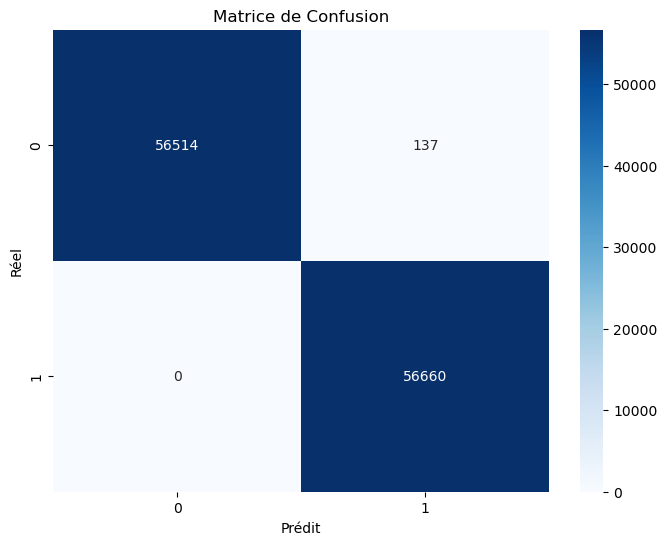

In [37]:
# Visualize the confusion matrix  
plt.figure(figsize=(8, 6))  
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')  
plt.title('Matrice de Confusion')  
plt.xlabel('Prédit')  
plt.ylabel('Réel')  
plt.show() 

In [38]:
# Scale the features  
scaler = StandardScaler()  
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

# Test different k values with cross-validation  
k_values = range(1, 15)  # Test k from 1 to 14  
cv_scores = []  

# Using a smaller subset for validation/testing  
# Comment this out if dataset is very small or to utilize full dataset for results  
# X_train_scaled, _, y_train, _ = train_test_split(X_train_scaled, y_train, train_size=0.1, stratify=y_train, random_state=42)  

for k in k_values:  
    knn = KNeighborsClassifier(n_neighbors=k)  
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=3, scoring='accuracy')  # Lowering cv to 3 for quicker results  
    cv_scores.append(scores.mean())  

# Print the results  
for k, score in zip(k_values, cv_scores):  
    print(f'k={k}, Cross-Validation Accuracy={score:.4f}') 

In [39]:
# Find the optimal k 
optimal_k = k_values[cv_scores.index(max(cv_scores))]  
print(f"Le nombre optimal de voisins est : {optimal_k}") 

In [40]:
# View results 
plt.figure(figsize=(10, 6))  
#"plt.plot(k_values, cv_scores, marker='o')  
#"plt.title('Validation Croisée pour différents k')  
plt.xlabel('Nombre de Voisins (k)')  
plt.ylabel('Précision')  
plt.xticks(k_values)  
plt.grid()  
plt.show()  

In [41]:
# Check the shapes  
print("Training set size:", X_train.shape, "Test set size:", X_test.shape)  
print("Class distribution in training set:", pd.Series(y_train).value_counts())  
print("Class distribution in testing set:", pd.Series(y_test).value_counts())

Training set size: (453241, 30) Test set size: (113311, 30)
Class distribution in training set: Class
1    226639
0    226602
Name: count, dtype: int64
Class distribution in testing set: Class
1    56660
0    56651
Name: count, dtype: int64


In [42]:
# Define the hyperparameter grid  
param_dist = {  
    'n_estimators': [100, 200],  # Start with fewer estimators  
    'max_features': ['auto', 'sqrt'],  
    'max_depth': [None, 10],  
    'min_samples_split': [2],  
    'min_samples_leaf': [1, 2]  
}  

# Initialize the RandomizedSearchCV object  
random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),   
                                   param_distributions=param_dist,   
                                   n_iter=10,  # Reduce iterations for faster initial testing  
                                   cv=3,  # Lower to 3 for quicker validation  
                                   n_jobs=-1,   
                                   verbose=2,   
                                   random_state=42)  

# Adjust search on training data  
random_search.fit(X_train, y_train)  

# Get the best settings and score  
best_params = random_search.best_params_  
best_score = random_search.best_score_  

print(f"Meilleurs paramètres : {best_params}")  
print(f"Meilleur score de validation croisée : {best_score}")  

# Make predictions on the test set using the best estimator  
best_model = random_search.best_estimator_  
y_pred = best_model.predict(X_test)  

# Classification report on the test set  
print(classification_report(y_test, y_pred))  

In [43]:
model = RandomForestClassifier(n_estimators=100, random_state=42)  
model.fit(X_train_scaled, y_train) 

RandomForestClassifier(random_state=42)

In [44]:
# Make predictions on the test data  
y_pred2 = model.predict(X_test_scaled)  

# Evaluate the model  
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))  
print("Classification Report:\n", classification_report(y_test, y_pred2))  
print("Accuracy Score:\n", accuracy_score(y_test, y_pred2))  


Confusion Matrix:
 [[56642     9]
 [    0 56660]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       1.00      1.00      1.00     56660

    accuracy                           1.00    113311
   macro avg       1.00      1.00      1.00    113311
weighted avg       1.00      1.00      1.00    113311

Accuracy Score:
 0.9999205725834208


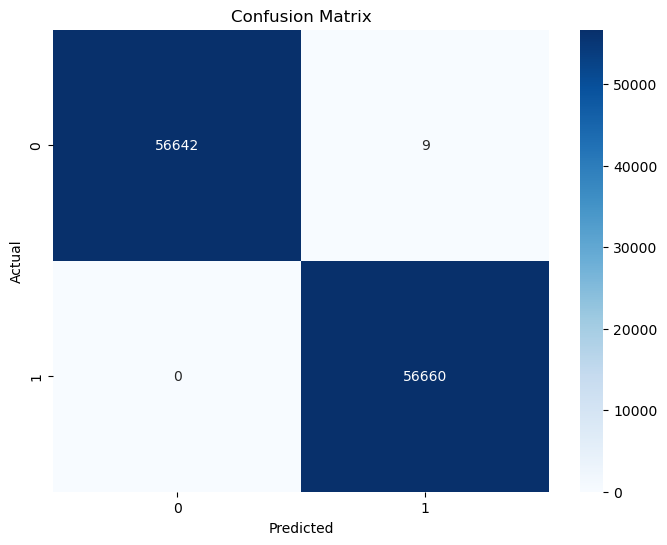

In [45]:
# Visualize the confusion matrix  
plt.figure(figsize=(8, 6))  
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, fmt='d', cmap='Blues')  
plt.title('Confusion Matrix')  
plt.xlabel('Predicted')  
plt.ylabel('Actual')  
plt.show() 

In [48]:
# Calculation of evaluation scores 
models = ['RandomForestClassifier', 'KNeighborsClassifier']  

accuracy_scores = [  
    accuracy_score(y_test, y_pred2),  
    accuracy_score(y_test, y_pred)
]  

f1_score = [  
    f1_score(y_test, y_pred2),  
    f1_score(y_test, y_pred)    
]  

matrice_confusion = [  
    confusion_matrix(y_test, y_pred2),  
    confusion_matrix(y_test, y_pred) 
]  

In [49]:
# Creating the results table
results = pd.DataFrame({  
    'Model': models,  
    'accuracy score': accuracy_scores,
    'f1 score' : f1_score,
    'Matrice Confusion' : matrice_confusion})  

results.set_index('Model', inplace=True)

In [50]:
# Displaying results 
print(results) 

                        accuracy score  f1 score           Matrice Confusion
Model                                                                       
RandomForestClassifier        0.999921  0.999921    [[56642, 9], [0, 56660]]
KNeighborsClassifier          0.998791  0.998792  [[56514, 137], [0, 56660]]


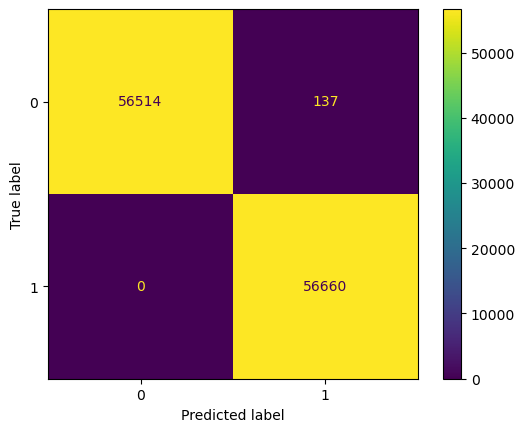

In [53]:
confusion_matrix = metrics.confusion_matrix(y_test , y_pred)
cm_display =  metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

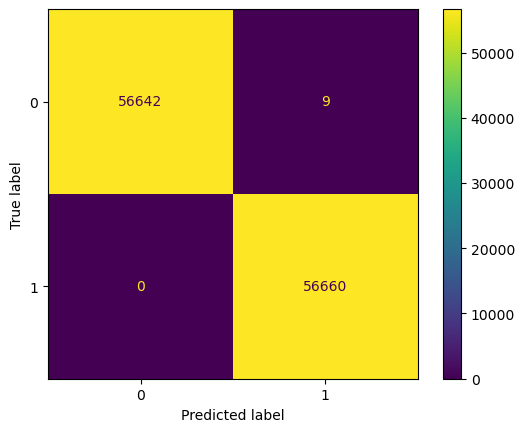

In [54]:
confusion_matrix = metrics.confusion_matrix(y_test , y_pred2)
cm_display =  metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()